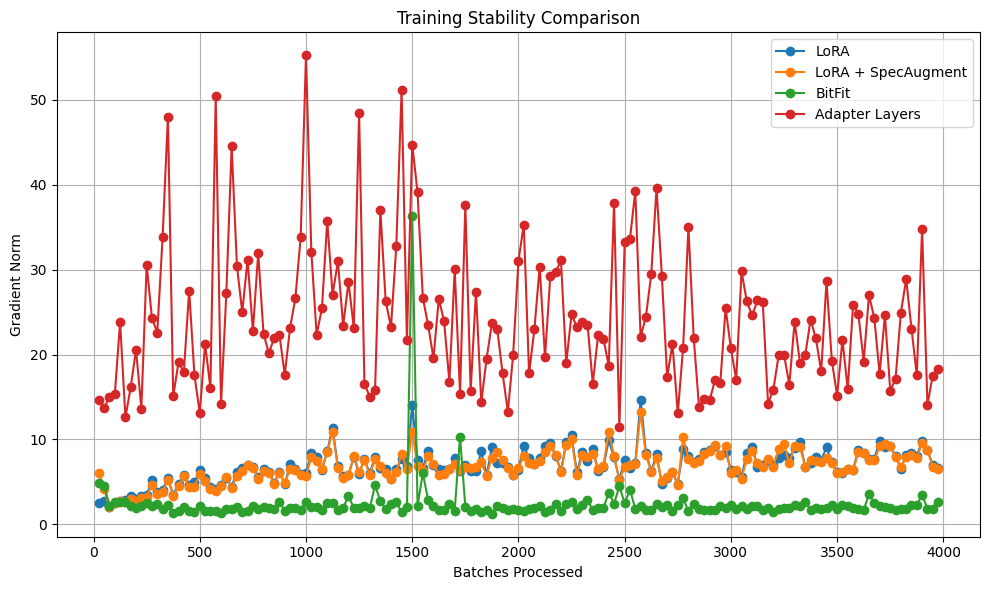

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def load_csv(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"{file_path} not found.")
    return pd.read_csv(file_path)[['Step', 'Value']]

def auto_range(series, buffer_ratio=0.05):
    """Compute a dynamic axis range with a buffer around the min and max."""
    min_val = series.min()
    max_val = series.max()
    buffer = (max_val - min_val) * buffer_ratio
    return min_val - buffer, max_val + buffer

def plot_multiple_curves(dfs, labels, x_col="Step", y_col="Value", 
                         x_label="Batches Processed", y_label="Runtime", title="Evaluation Runtime"):
    plt.figure(figsize=(10, 6))
    
    for df, label in zip(dfs, labels):
        plt.plot(df[x_col], df[y_col], marker='o', linestyle='-', label=label)

    # Labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Combine all steps and values to determine dynamic axis range
    all_steps = pd.concat([df[x_col] for df in dfs])
    all_values = pd.concat([df[y_col] for df in dfs])

    x_min, x_max = auto_range(all_steps)
    y_min, y_max = auto_range(all_values)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    base_path = "gradient_norm_curves"
    filenames = [
        "lora_train_grad_norm.csv",
        "spec_train_grad_norm.csv",
        "bitfit_train_grad_norm.csv",
        "adapter_train_grad_norm.csv"
    ]

    labels = [
        "LoRA",
        "LoRA + SpecAugment",
        "BitFit",
        "Adapter Layers"
    ]

    # Load all datasets
    dfs = [load_csv(os.path.join(base_path, filename)) for filename in filenames]

    # Plot all together
    plot_multiple_curves(dfs, labels, 
                         x_label="Batches Processed", 
                         y_label="Gradient Norm", 
                         title="Training Stability Comparison")
